# Multi-modal generation pipeline

## Image, Captions, and a Video
In this notebook you will learn how to using *Stable Diffusion* via `LangChain` to generate an image, a caption for your choice of `llm`, and finally generate a video based on a generated "*improved prompt*".

## Get Started
**Installation**:

In [6]:
%pip install -Uq gradio_tools langchain pillow openai tokenizers

Found existing installation: transformers 4.34.1
Uninstalling transformers-4.34.1:
  Successfully uninstalled transformers-4.34.1
Found existing installation: torch 2.1.1
Uninstalling torch-2.1.1:
  Successfully uninstalled torch-2.1.1
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


**Enable LangSmith tracing**:

In [7]:
import os
# You are *not* required to set the LangChain env variables. Use them if you have access to LangSmith's Hub.
os.environ["LANGSMITH_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "generate-and-caption"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = ""


os.environ["OPENAI_API_KEY"] = "" # This one is required

In [8]:
from gradio_tools.tools import (
    ImageCaptioningTool,
    StableDiffusionPromptGeneratorTool,
    StableDiffusionTool,
    TextToVideoTool,
)
from langchain.agents import AgentType, Tool, initialize_agent
from langchain.chat_models import ChatOpenAI
from langchain.memory import ConversationBufferMemory
from PIL import Image
from IPython.display import display

c:\Users\dae\.vscode\Software\Build-RAGAI\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Set up paths
IMAGE_PATH = 'generated_image.jpg'
CAPTION_PATH = 'generated_caption.txt'

### StableDiffusionTool()
First, let's test the image generation capabilities.

Loaded as API: https://gradio-client-demos-text-to-image.hf.space ✔

Job Status: Status.STARTING eta: None


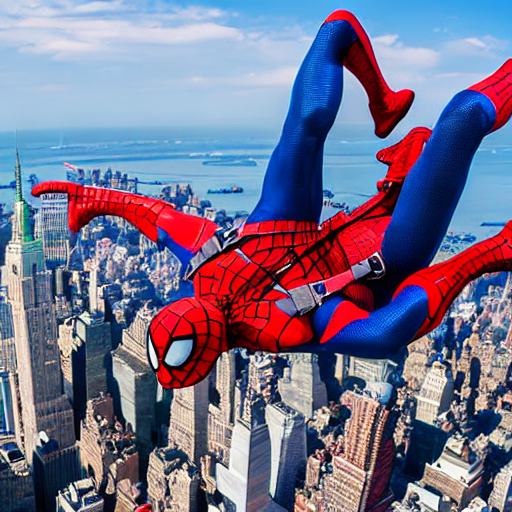

In [10]:
local_file_path = StableDiffusionTool().langchain.run(
    "Please create a selfie of Spiderman 2099, miguel ohara, skydiving stunt in New York City Skyline"
)
im = Image.open(local_file_path)
display(im)

Now that we've proved to ourselves that we can generate images programmatically, let's integrate this functionality, along with others, as a tool using `langchain`!
We'll make use of 
  1. `StableDiffusionTool().langchain`
  2. `ImageCaptioningTool().langchain`
  3. `StableDiffusionPromptGeneratorTool().langchain`
  4. `TextToVideoTool().langchain`

Learn more about these tools, [here]().

---

## Creating the Agent Executor and Assigning it Tools

***NOTE***:If the below cell fails because the HuggingFace "Space" is building, just run it again until it works.

See my output below for an example. If you already ran the cell, you won't be able to see my output.

In [12]:
llm = ChatOpenAI(model_name="gpt-3.5-turbo-1106", temperature=0)
memory = ConversationBufferMemory(memory_key="chat_history")

# Pass in the tools
tools = [
    StableDiffusionTool().langchain,
    ImageCaptioningTool().langchain,
    StableDiffusionPromptGeneratorTool().langchain,
    TextToVideoTool().langchain,
]

# Initialize the agent
agent = initialize_agent(
    tools, llm, memory=memory, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True, handle_parsing_errors=True
)
output = agent.run(
    input=(
        "Please create a black chiweenie riding a skateboard"
        "but improve my prompt prior to using an image generator."
        "Use the exact prompt you wrote for the image generator to generate a video."
    )
)

Loaded as API: https://gradio-client-demos-text-to-image.hf.space ✔
Space is still building. Please wait...
Loaded as API: https://gradio-client-demos-blip-2.hf.space ✔
Loaded as API: https://microsoft-promptist.hf.space ✔
Loaded as API: https://damo-vilab-modelscope-text-to-video-synthesis.hf.space ✔


c:\Users\dae\.vscode\Software\Build-RAGAI\.venv\lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(
c:\Users\dae\.vscode\Software\Build-RAGAI\.venv\lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
I should use the StableDiffusionPromptGenerator to improve my prompt for the image generator and then use the TextToVideo tool to create a video from the updated prompt.
Action: StableDiffusionPromptGenerator
Action Input: "Create a black chiweenie riding a skateboard"
Job Status: Status.STARTING eta: None

Observation: Create a black chiweenie riding a skateboard, RPG Reference, Oil Painting, Trending on Artstation, octane render, Insanely Detailed, 8k, HD
Thought:The prompt has been improved with more specific and detailed keywords.
Action: TextToVideo
Action Input: "Create a black chiweenie riding a skateboard, RPG Reference, Oil Painting, Trending on Artstation, octane render, Insanely Detailed, 8k, HD"
Job Status: Status.STARTING eta: None

Observation: C:\Users\dae\AppData\Local\Temp\gradio\2331a3dafcdf059a78d74c5eb4a5e8bb5b33606c\tmphq9yq27o.mp4
Thought:I now know the final answer
Final Answer: The video of a black chiweenie riding a skate

### Conclusion

The Agent Executor did great. It correctly chose the prompt generator first, and then the video creation tool from its tool list. It also correctly knew when it had the final answer, and returned that to us.